In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
% matplotlib inline

In [3]:
digits=load_digits()

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
print("image Data shape",digits.data.shape)
print("image Data shape",digits.target.shape)

image Data shape (1797, 64)
image Data shape (1797,)


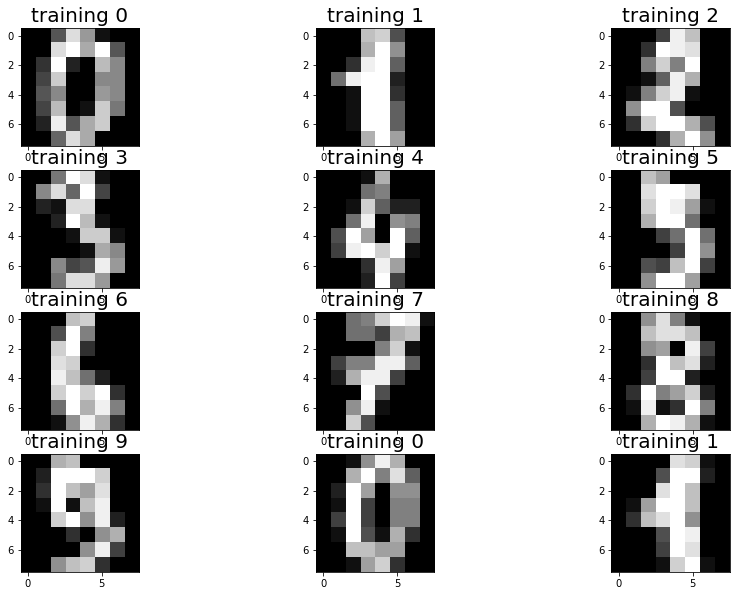

In [10]:
plt.figure(figsize=(15,10))
for index, (image,label) in enumerate(zip(digits.data[:12],digits.target[:12])):
    plt.subplot(4,3,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title(f"training {label}",fontsize=20)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2,random_state=2)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [13]:
from sklearn.linear_model import LogisticRegression


In [14]:
l_r=LogisticRegression()
l_r.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
pred=l_r.predict(x_test)

In [16]:
pred[0]

4

In [17]:
score=l_r.score(x_test,y_test)
score

0.9361111111111111

In [18]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,pred)

In [19]:
print(cm)

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  3  2  0]
 [ 0  2  0  0 31  0  0  0  1  1]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  2  0  0  0  0  0  0 33  1]
 [ 0  0  0  1  0  1  0  1  3 22]]


Text(0.5,1,'Accuracy= 0.9361111111111111')

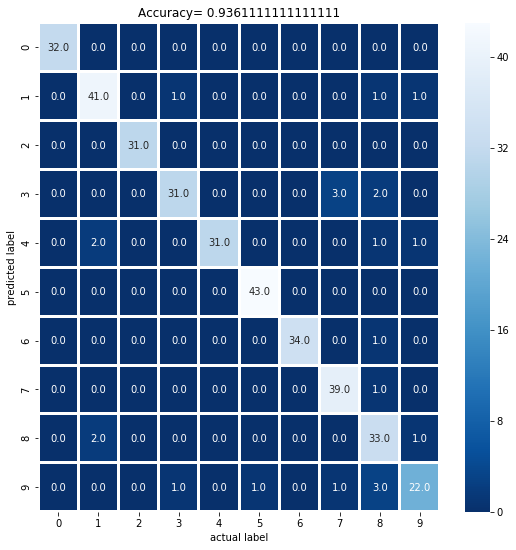

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,cmap="Blues_r",fmt=".1f",linewidth=2)
plt.xlabel("actual label")
plt.ylabel("predicted label")
plt.title("Accuracy= {}".format(score))

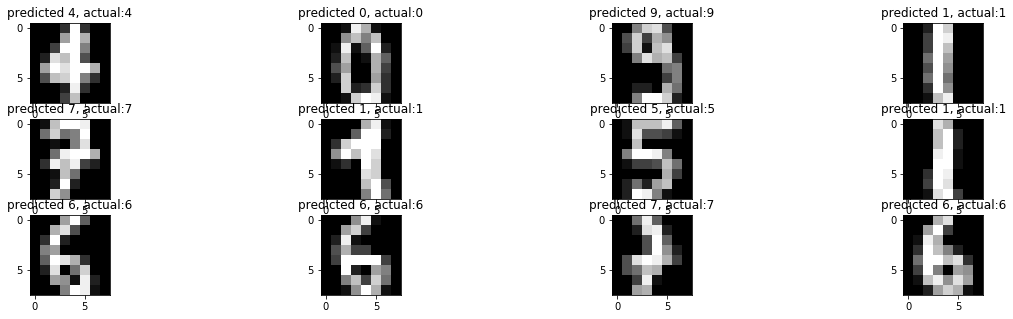

In [21]:
index=0
classifiedindex=[]
for predict,actual in zip(pred,y_test):
    if predict==actual:
        classifiedindex.append(index)
    index+=1
plt.figure(figsize=(20,5))
for plotindex, correct_pred in enumerate(classifiedindex[:12]):
    plt.subplot(3,4,plotindex+1)
    plt.imshow(np.reshape(x_test[correct_pred],(8,8)),cmap=plt.cm.gray)
    plt.title(f"predicted {pred[correct_pred]}, actual:{y_test[correct_pred]}")